# Case Study on Correlation and Regression

# A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)

In [3]:
# Import the required libraries and load the dataset 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sales_data = pd.read_csv('Add_sales_data_2018.csv')

In [2]:
#Check the data in each columns
sales_data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [4]:
# Derive column names
sales_data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [6]:
#Check data types
sales_data.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [7]:
# Check if any of the columns is null
sales_data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [8]:
# Study the data and check the main stat values (count,mean,std,min,max etc)
sales_data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


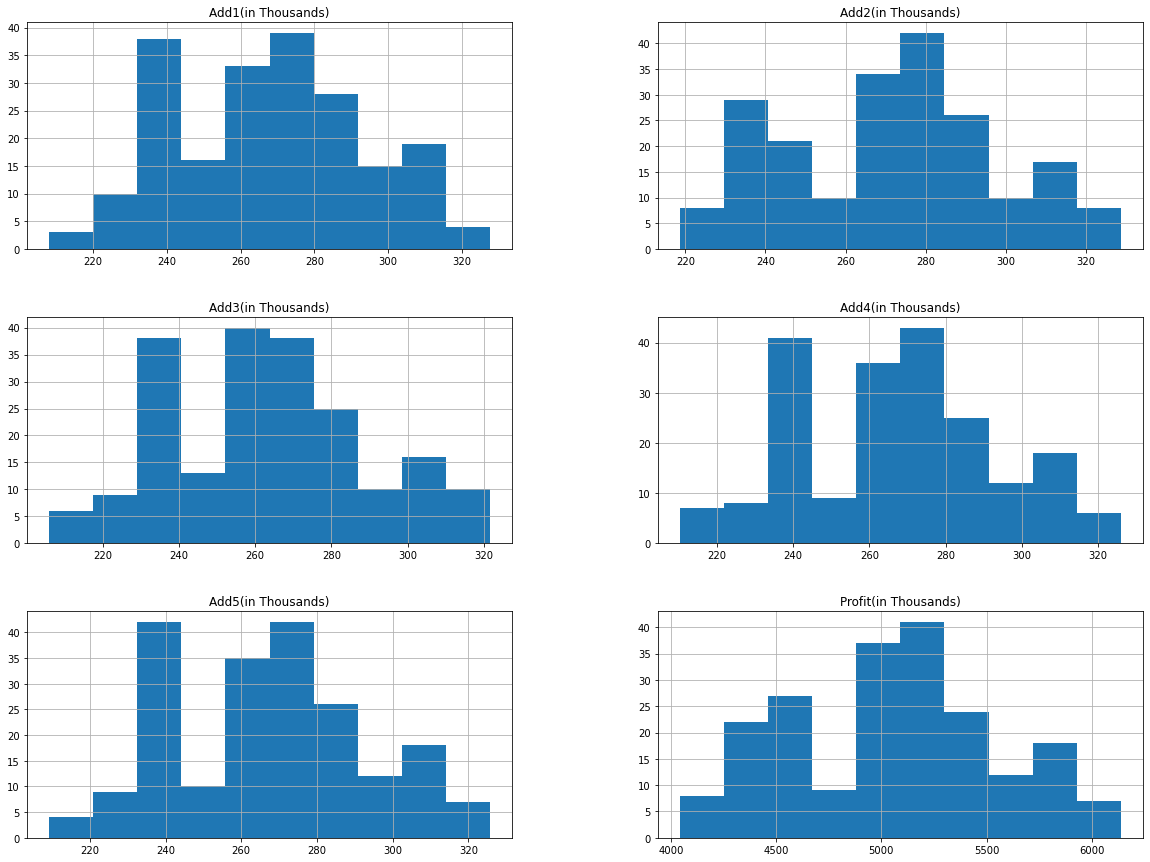

In [9]:
# Visualize the data by plotting histograms for each column distribution
freqgraph = sales_data.select_dtypes(['float64'])
freqgraph.hist(figsize=(20,15))
plt.show()

# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

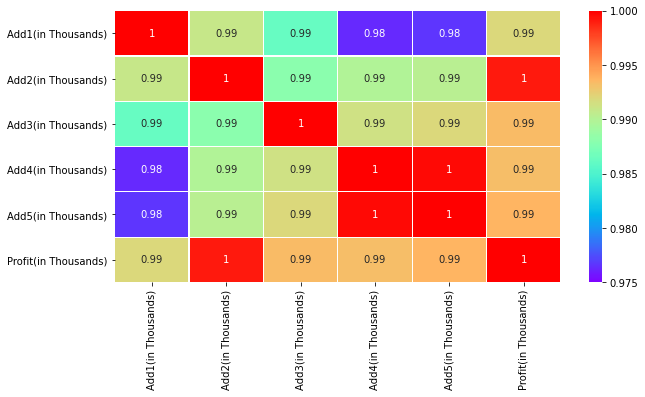

In [12]:
# Create the heat map between the correlation between each columns in the dataset
sales_corr_data = sales_data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(sales_corr_data,vmin=.975,vmax=1,annot=True,linewidth=0.2,cmap='rainbow')

In [ ]:
# We could notice that almost all columns have a high correlation of >=0.98 between each other. But, the correlation values 
# between Add4 and Add5 ( Both in thousands) are exactly 1. So, one of these columns can be eliminated while 
# creating the regression model

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [13]:
# As infered from question 1 , we can drop Add4 column since it is highly corelated to Add5 and create the regression model

sales_data_reqd_cols = sales_data.drop(['Add4(in Thousands)'],axis=1)

# Model 1

In [ ]:
 # The dependent variable('y') is profit in thousands 
y = sales_data_reqd_cols['Profit(in Thousands)']
# The independent variables are all other columns except Date & profit ( Add4 is already dropped )
x = sales_data_reqd_cols.drop(['Date','Profit(in Thousands)'],axis=1)
# Use the training model to make future predictions with 20% test size and 80% training size
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)


In [15]:
# Check the predicted values and actual values

In [16]:
predictions

array([4153.27545349, 4445.73004619, 5130.52882637, 4906.51003111,
       5006.83829552, 4623.3730661 , 5384.61181823, 5328.12178883,
       5174.25834283, 5956.19250176, 5780.69521274, 4998.64258624,
       5075.7581675 , 5783.18604238, 4936.51119211, 5065.32351051,
       4190.86616915, 5034.92724764, 5013.76045633, 5134.50334278,
       5145.26772667, 5422.50254931, 4569.03526175, 4597.94049005,
       4436.70490492, 4175.24282289, 5616.25454411, 5667.28466418,
       4648.94589473, 5717.8495839 , 5000.54215905, 5182.27940317,
       5017.71485201, 5545.29847919, 5013.73982034, 5033.29657638,
       5108.67989299, 4760.08423647, 4604.89118199, 4925.5997048 ,
       5252.38632566])

In [17]:
y_test

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64

In [18]:
# Check the mean square error and see if the model can be improved
from sklearn.metrics import mean_squared_error
MSE_sale = mean_squared_error(y_test,predictions)

In [19]:
MSE_sale

0.8506975615642467

In [ ]:
# The Mean square error built using above model has a value close to 1 and can be improved

# Model 2 

In [21]:
# Trying a model without dropping any columns other than 'date'
x_no_drop = sales_data.drop(['Date','Profit(in Thousands)'],axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_no_drop,y,random_state=42,test_size=0.20)
from sklearn import linear_model
lr2 = linear_model.LinearRegression()
model2 = lr2.fit(x_train,y_train)
predictions2 = model2.predict(x_test)

In [ ]:
# Now check the predicted values v/s actual for model 2 

In [22]:
predictions2

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788])

In [23]:
y_test

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64

In [24]:
# The predicted values are almost close to the actuals
#check the mean square error for Model 2 
from sklearn.metrics import mean_squared_error
MSE_sale_2 = mean_squared_error(y_test,predictions2)

In [25]:
MSE_sale_2

6.657795174207296e-25

In [ ]:
# As we can see the above Mean square value is very small (close to 0) and therefore is a better model 

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

# Add1(in Thousands) 290
# Add2(in Thousands) 312
# Add3(in Thousands) 309
# Add4(in Thousands) 298
# Add5(in Thousands) 320

In [28]:
# Provide the above values in an array and see the value in predictions variable for Model 2 which happens to be the better one

test_add_values = [[290,312,309,298,320]]

# Calculate the predicted profit
predicted_profit_model2 = model2.predict(test_add_values)


In [29]:
predicted_profit_model2

array([5820.06])

In [30]:
predicted_profit_model2.item()

5820.06

In [ ]:
# As we can see , the predicted profit (in thousands) in this case is 5820.06.